In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno

__Import des données dans le dataframe "df" et paramétrage des options__

In [23]:
df = pd.read_csv("kc_house_data.cleaning.csv")
pd.options.display.max_columns = 100
df.shape

(21613, 21)

__Matrice des données__

<AxesSubplot:>

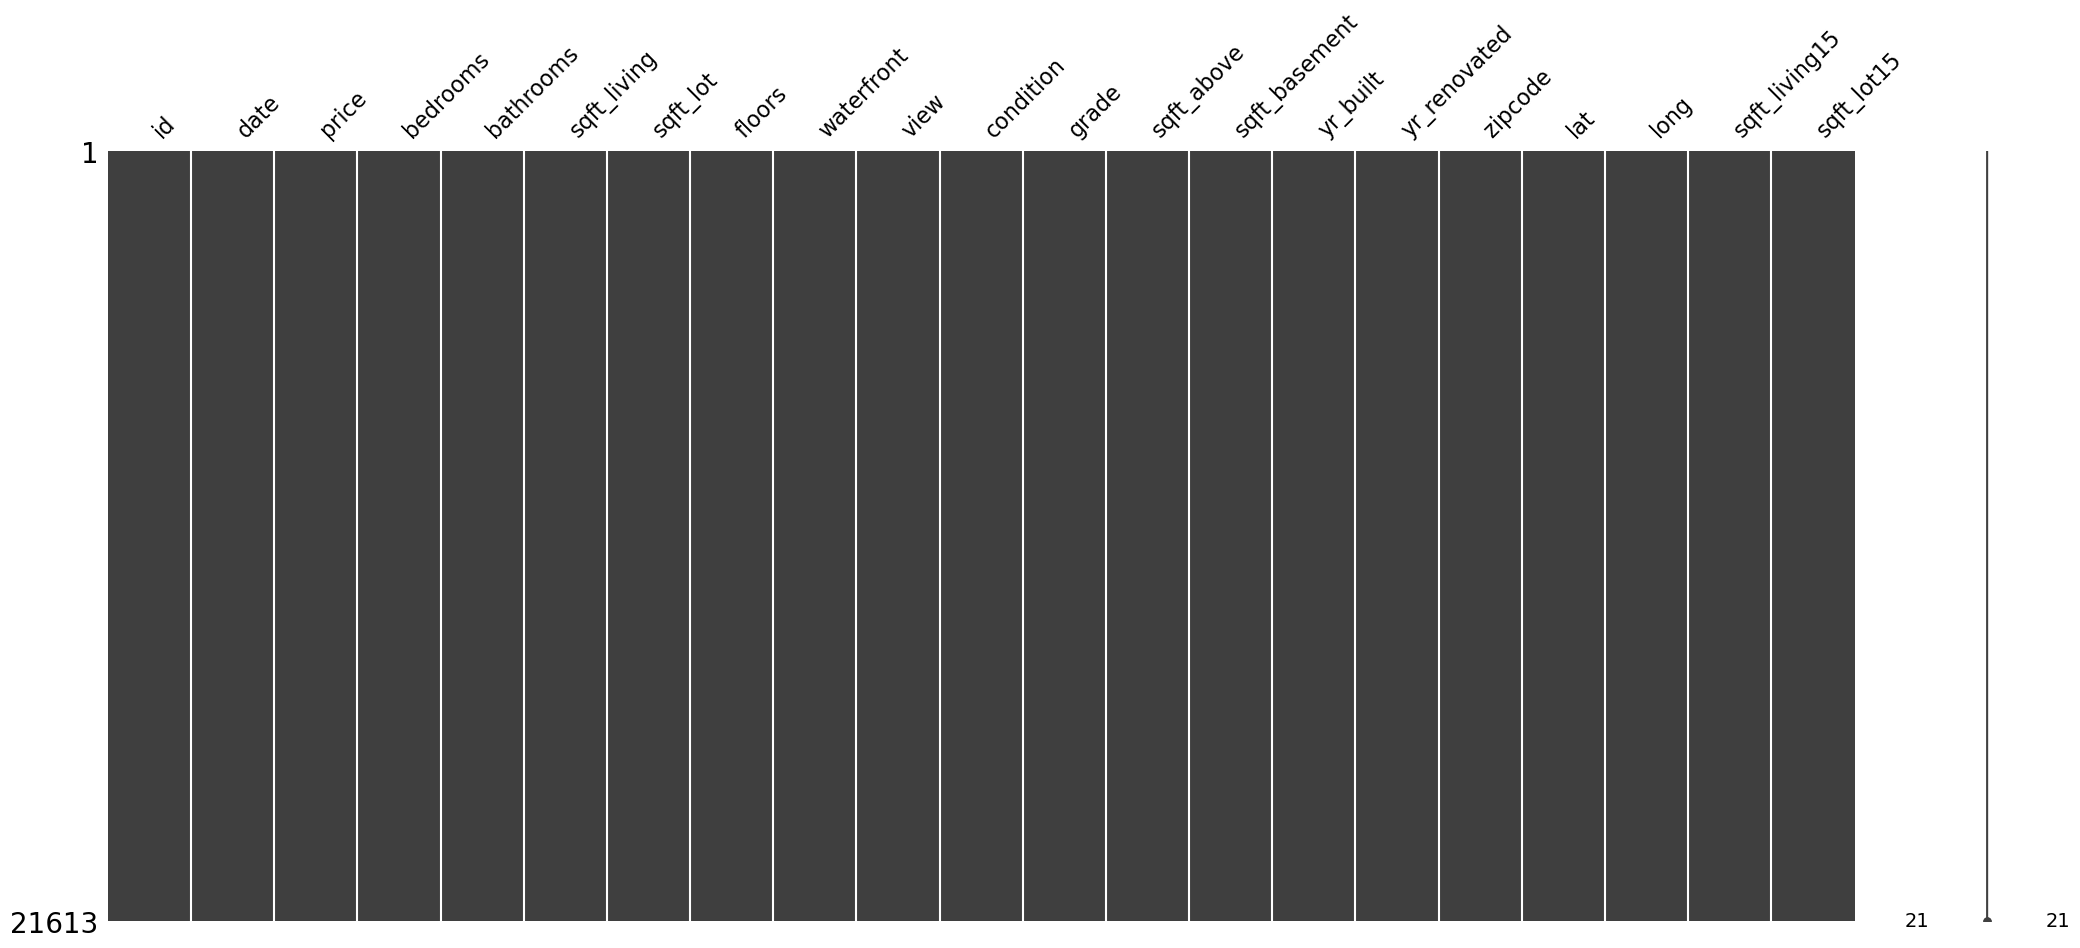

In [24]:
msno.matrix(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

__5 premières lignes__

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Renommage des colonnes__

In [27]:
df.rename(columns={
    "price" : "prix", 
    "bedrooms" : "chambres",
    "bathrooms" : "salle_de_bain",
    "sqft_living" : "m2_habitable",
    "sqft_lot" : "m2_parcelle",
    "floors" : "etages",
    "waterfront" : "vue_mer",
    "view" : "vue",
    "grade" : "note",
    "sqft_above" : "m2_etage",
    "sqft_basement" : "m2_cave",
    "yr_built" : "annee_construction",
    "yr_renovated" : "annee_renovation",
    "zipcode" : "cp",
    "long" : "lon",
    "sqft_living15" : "m2_habitable15",
    "sqft_lot15" : "m2_parcelle15"
},
        inplace=True)
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Graphiques de toutes les données__

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'prix'}>,
        <AxesSubplot:title={'center':'chambres'}>,
        <AxesSubplot:title={'center':'salle_de_bain'}>],
       [<AxesSubplot:title={'center':'m2_habitable'}>,
        <AxesSubplot:title={'center':'m2_parcelle'}>,
        <AxesSubplot:title={'center':'etages'}>,
        <AxesSubplot:title={'center':'vue_mer'}>],
       [<AxesSubplot:title={'center':'vue'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'note'}>,
        <AxesSubplot:title={'center':'m2_etage'}>],
       [<AxesSubplot:title={'center':'m2_cave'}>,
        <AxesSubplot:title={'center':'annee_construction'}>,
        <AxesSubplot:title={'center':'annee_renovation'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'m2_habitable15'}>,
        <AxesSubplot:title={'

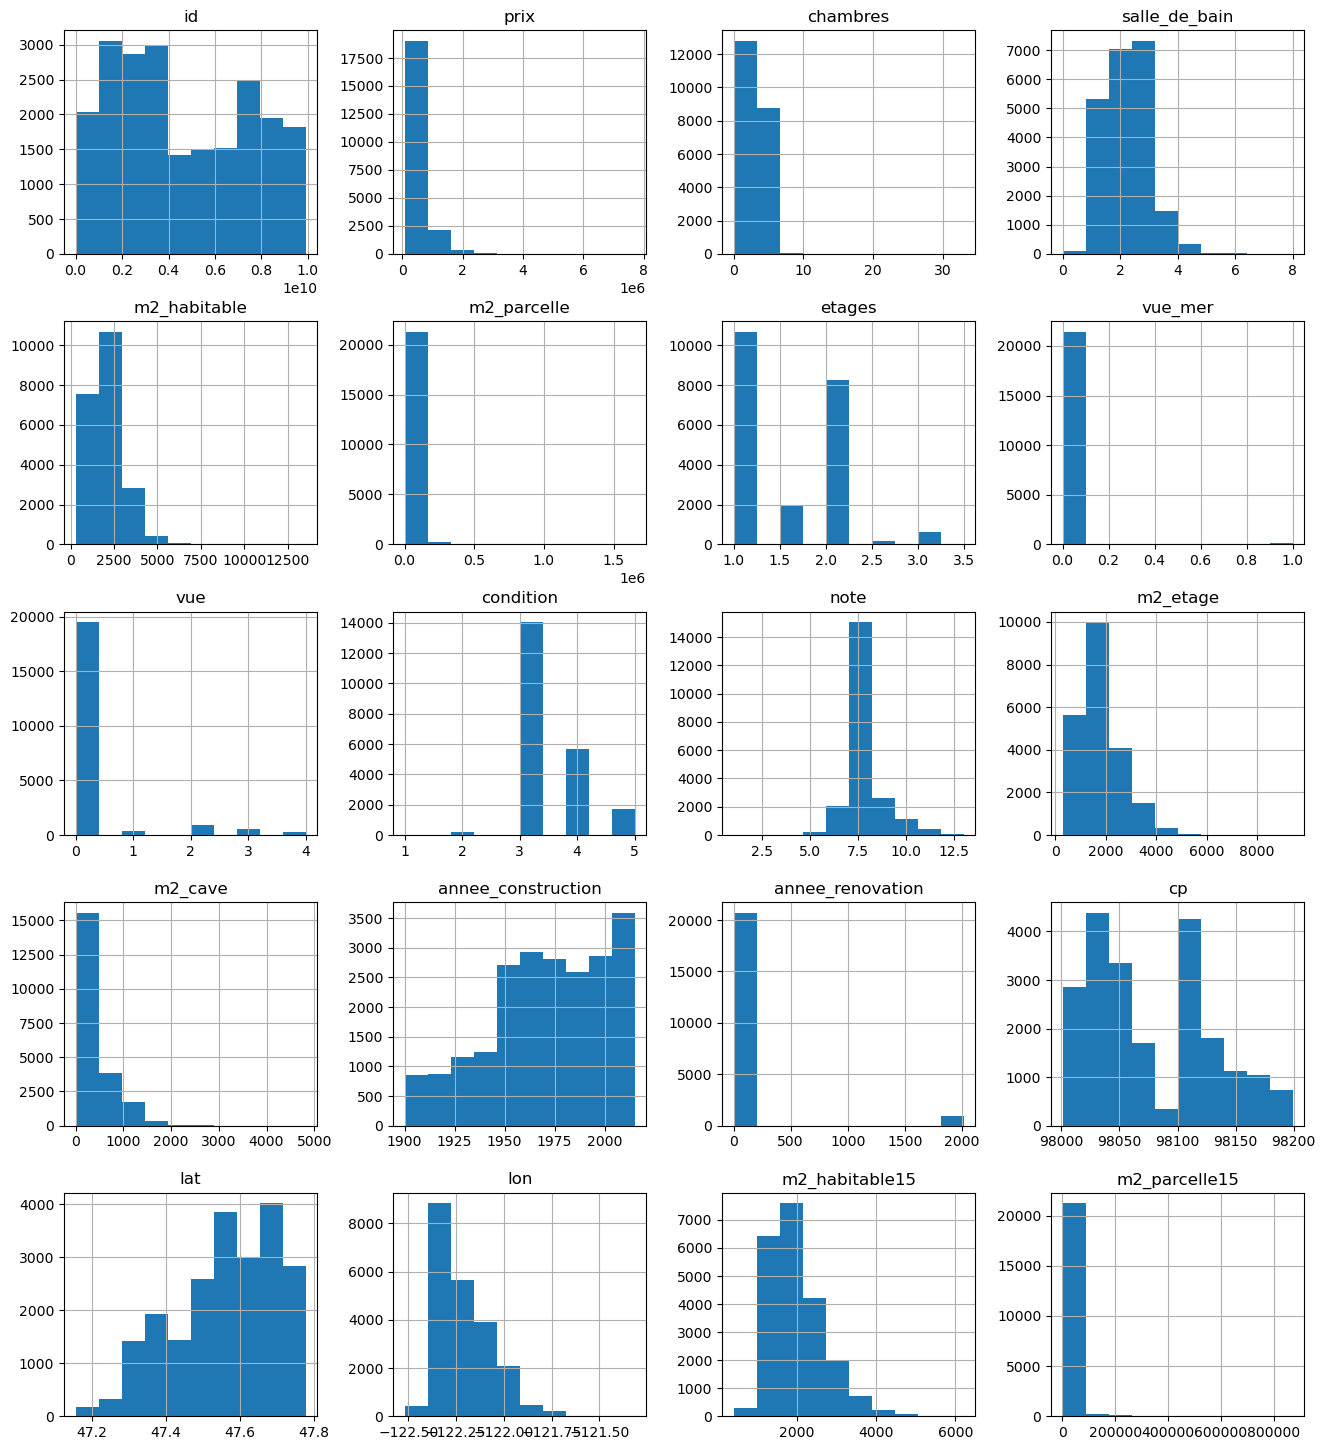

In [28]:
df.hist(figsize=(16,18))

Les chambres semblent avoir un potentiel soucis (ça monte jusque 30)\
L'année de rénovation a plus de 20 000 entrées à 0\
Le code postal est potentiellement pas intéressant dans l'état

__Affichage des id redondant (pour les maisons ayant eu de multiple vente)__

In [29]:
df.loc[df["id"].duplicated(keep=False),:]

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


__Description des données__

In [30]:
df.describe()

,id,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


__Nombre d'entrées ayant moins d'une chambre__

In [31]:
len(df.loc[df["chambres"] < 1])

13

__Drop des 13 entrées ayant 0 chambres (21613 -> 21600)__

In [32]:
df = df[df.chambres != 0]
#df.drop(df[df.chambres != 0].chambres, inplace = True) - Retire 12 entrées au lieu de 13
df.shape

(21600, 21)

__Graphique de toutes les valeurs de chambres__

<AxesSubplot:xlabel='chambres', ylabel='count'>

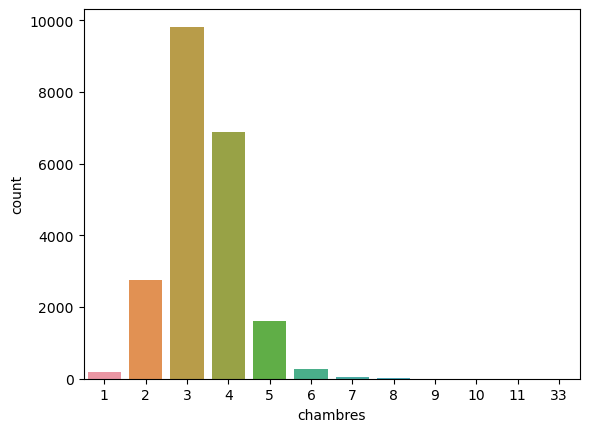

In [33]:
sns.countplot(x = df["chambres"])

__Rangement des valeurs avec la colonne "chambres"__

In [34]:
df.sort_values(by=["chambres"])

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
18959,6430500191,20141106T000000,315000.0,1,1.00,700,3876,1.0,0,0,3,6,700,0,1910,0,98103,47.6886,-122.352,1150,3952
12135,1773100765,20150429T000000,229000.0,1,1.00,600,3720,1.0,0,0,3,6,600,0,1920,0,98106,47.5558,-122.363,1480,4800
18308,3524039060,20140601T000000,250000.0,1,1.00,750,4000,1.0,0,0,3,6,750,0,1918,0,98136,47.5243,-122.390,1770,4850
154,7920100045,20140516T000000,350000.0,1,1.00,700,5100,1.0,0,0,3,7,700,0,1942,0,98115,47.6790,-122.300,1010,5100
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,5,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960


__Edit de l'entrée ayant 33 chambres vers 3 chambres__

In [35]:
df.loc[15870,"chambres"] = 3
df.sort_values(by=["chambres"])

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
18959,6430500191,20141106T000000,315000.0,1,1.00,700,3876,1.0,0,0,3,6,700,0,1910,0,98103,47.6886,-122.352,1150,3952
18308,3524039060,20140601T000000,250000.0,1,1.00,750,4000,1.0,0,0,3,6,750,0,1918,0,98136,47.5243,-122.390,1770,4850
12135,1773100765,20150429T000000,229000.0,1,1.00,600,3720,1.0,0,0,3,6,600,0,1920,0,98106,47.5558,-122.363,1480,4800
154,7920100045,20140516T000000,350000.0,1,1.00,700,5100,1.0,0,0,3,7,700,0,1942,0,98115,47.6790,-122.300,1010,5100
5752,7624700050,20141223T000000,565000.0,1,1.00,1370,6250,1.5,0,0,4,7,1370,0,1921,0,98136,47.5571,-122.385,1450,6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


__Nombre d'entrées ayant zéro salle de bain__

In [36]:
len(df.loc[df["salle_de_bain"] == 0])

3

__Drop des 3 salle de bain (21600 -> 21597)__

In [37]:
df = df[df.salle_de_bain != 0]
#df.drop(df[df.chambres != 0].chambres, inplace = True) - Retire 2 entrées au lieu de 3
df.shape

(21597, 21)

__Graphique de toutes les valeurs de salle de bain__

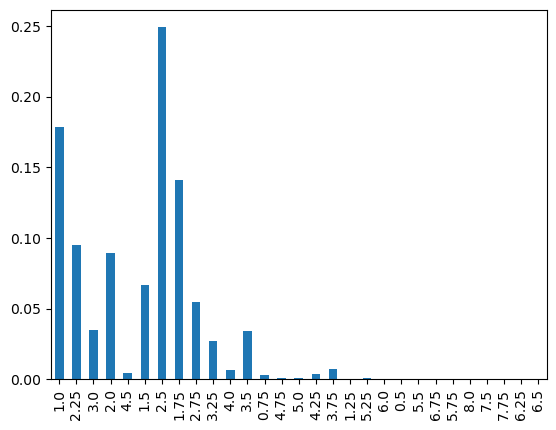

In [38]:
df["salle_de_bain"].value_counts(normalize=True, sort=False).plot(kind='bar')
plt.show()

__Rangement des valeurs avec la colonne "salle_de_bain"__

In [39]:
df.sort_values(by=["salle_de_bain"])

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
2261,3971701455,20141003T000000,273000.0,2,0.50,1180,7750,1.0,0,0,4,6,590,590,1945,0,98155,47.7690,-122.316,1380,8976
12041,2991000160,20141212T000000,312500.0,4,0.50,2300,5570,2.0,0,0,3,8,2300,0,1996,0,98092,47.3285,-122.168,1820,6371
11674,7987400316,20140814T000000,255000.0,1,0.50,880,1642,1.0,0,0,3,6,500,380,1910,0,98126,47.5732,-122.372,1410,2992
10424,7129800036,20150114T000000,109000.0,2,0.50,580,6900,1.0,0,0,3,5,580,0,1941,0,98118,47.5135,-122.262,1570,5040
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


__Graphique du nombre de chambre face au salle de bain__

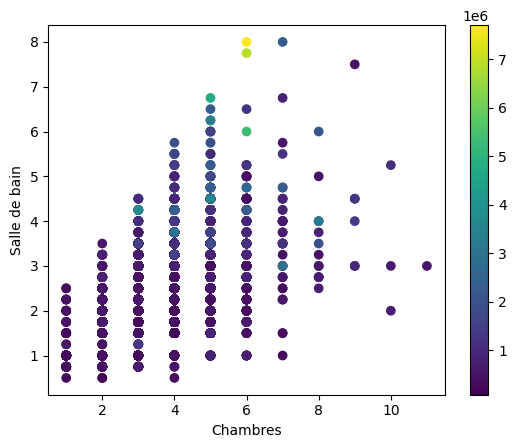

In [40]:
plt.scatter(df["chambres"], df["salle_de_bain"], c=df["prix"])
plt.xlabel("Chambres")
plt.ylabel("Salle de bain")
plt.colorbar()

__Corrélation des colonnes en rapport au prix__

In [41]:
df.corr()["prix"].sort_values(ascending=False)

prix                  1.000000
m2_habitable          0.701909
note                  0.667922
m2_etage              0.605371
m2_habitable15        0.585247
salle_de_bain         0.525905
vue                   0.397318
m2_cave               0.323776
chambres              0.315960
lat                   0.306777
vue_mer               0.266437
etages                0.256814
annee_renovation      0.126415
m2_parcelle           0.089882
m2_parcelle15         0.082837
annee_construction    0.053984
condition             0.036025
lon                   0.022092
id                   -0.016737
cp                   -0.053437
Name: prix, dtype: float64

__Export csv pour la préparation__

In [42]:
#df.to_csv("kc_house_data.preparation.csv", index=False)